# <center> Predicting House Sale Prices </center>

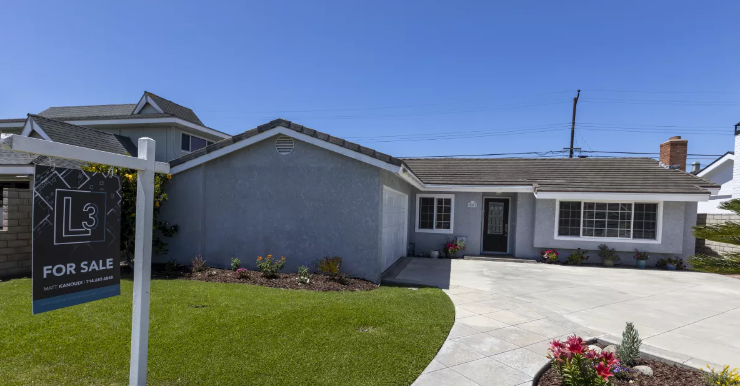

Predicting house prices is of utmost concern to many people, as housing is a significant expense for households, as well as a potentially profitable investment.  This project aims to create a multivariate linear regression model that will predict house sale prices in Ames, Iowa from 2006 to 2010. You can read more about what the different columns mean [here.](https://s3.amazonaws.com/dq-content/307/data_description.txt)  

# Introduction

We will commence by importing relevant libraries.

In [1]:
# Import libraries
import pandas as pd
pd.options.display.max_columns = 100
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import KFold
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

Next, we will read in the data and display the first five rows to understand what the dataset looks like.

In [2]:
# Read in the data
ames = pd.read_csv("AmesHousing.tsv", delimiter="\t")
ames.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


To create an optimal regression model that predicts house prices, it is important to set up a pipeline of functions that we can rapidly iterate on different models.  The pipeline below includes three different functions:
* `transform_features`- a function that transforms the various features of houses
* `select_features` - a function that selects various columns or features of houses
* `train_and_test` - a function that trains and tests our model

We will run this pipeline on our data to obtain an intial root mean squared error, or rmse. 

In [3]:
# Function to transform features (empty at the moment, but will modify later)
def transform_features(data):
    return data

# Select various features
def select_features(data):
    return data[['Gr Liv Area', 'SalePrice']]

# Train and test data
def train_and_test(data):
    train = data[:1460]
    test = data[1460:]
    # Select only numeric columns
    numeric_train = train.select_dtypes(include = ['float', 'integer'])
    numeric_test = test.select_dtypes(include = ['float', 'integer'])
    # Remove target column
    features = numeric_train.columns.drop('SalePrice')
    lr = linear_model.LinearRegression()
    lr.fit(train[features], train['SalePrice'])
    predictions = lr.predict(test[features])
    mse = mean_squared_error(test['SalePrice'], predictions)
    rmse = np.sqrt(mse)
    
    return rmse

# Apply functions on ames dataset
transform_ames = transform_features(ames)
filtered_ames = select_features(ames)
rmse_1 = train_and_test(filtered_ames)

rmse_1

57088.25161263909

In [4]:
# Median house sale price 
median = np.median(ames['SalePrice'])
median

160000.0

Our initial rmse is \\$57088, which is quite high considering the median of the house prices is only $160,000.  Our error is about 1/3 of the median sale price.  We will modify our model to lower this error by working with house features.

## Feature Engineering

Now we will work on the `transform_features` function by modifying features.  We will handle missing values by:
* For all columns, we will drop any columns with 5% or more missing values for now.
* For text columns, we will drop any with 1 or more missing values for now.
* For numerical columns, we will fill in missing values with the mode, or most common value in that column.

Let's start by determining which columns have missing, or null, values.

In [5]:
# Calculate number of null items in each column
ames_missing = ames.isnull().sum()
print(ames.shape)
print(ames_missing[ames_missing > 0])

(2930, 82)
Lot Frontage       490
Alley             2732
Mas Vnr Type        23
Mas Vnr Area        23
Bsmt Qual           80
Bsmt Cond           80
Bsmt Exposure       83
BsmtFin Type 1      80
BsmtFin SF 1         1
BsmtFin Type 2      81
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Electrical           1
Bsmt Full Bath       2
Bsmt Half Bath       2
Fireplace Qu      1422
Garage Type        157
Garage Yr Blt      159
Garage Finish      159
Garage Cars          1
Garage Area          1
Garage Qual        159
Garage Cond        159
Pool QC           2917
Fence             2358
Misc Feature      2824
dtype: int64


Next we will drop any columns with 5% or more missing values.

In [6]:
# Drop any column with 5% or more missing values
drop_null_cols = ames_missing[(ames_missing > 0.05*len(ames))].sort_values()
ames = ames.drop(drop_null_cols.index, axis = 1)

Let's progress to dropping any text columns with one or more missing values.

In [7]:
# Drop any text columns with one or more missing values
text_null_counts = ames.select_dtypes(include = ['object']).isnull().sum().sort_values(ascending = False)
drop_null_cols_2 = text_null_counts[text_null_counts > 0]
ames = ames.drop(drop_null_cols_2.index, axis = 1)

Now we will fill in numeric column missing values with the mode.

In [8]:
# Identify numeric columns with less than 5% missing values
num_null = ames.select_dtypes(['float', 'int']).isnull().sum()
fixable_num_cols = num_null[(num_null < 0.05*len(ames)) & (num_null > 0)].sort_values()
fixable_num_cols

BsmtFin SF 1       1
BsmtFin SF 2       1
Bsmt Unf SF        1
Total Bsmt SF      1
Garage Cars        1
Garage Area        1
Bsmt Full Bath     2
Bsmt Half Bath     2
Mas Vnr Area      23
dtype: int64

In [9]:
# Compute the mode for each column in `fixable_num_cols'
mode_dict = ames[fixable_num_cols.index].mode().to_dict(orient = 'records')[0]
mode_dict

{'BsmtFin SF 1': 0.0,
 'BsmtFin SF 2': 0.0,
 'Bsmt Unf SF': 0.0,
 'Total Bsmt SF': 0.0,
 'Garage Cars': 2.0,
 'Garage Area': 0.0,
 'Bsmt Full Bath': 0.0,
 'Bsmt Half Bath': 0.0,
 'Mas Vnr Area': 0.0}

In [10]:
# Fill missing values with modes
ames = ames.fillna(mode_dict)

In [11]:
# Check to make sure each column has no missing values
ames.isnull().sum().value_counts()

0    64
dtype: int64

Now that we have dealt with missing values, we can continue with modifying features to better capture information.  One such feature is `years_sold`, which captures how long a house was sold since it was built.  We will then determine how many rows have negative `years_sold` values and drop them.  

In [12]:
# `years_sold` feature
years_sold = ames['Yr Sold'] - ames['Year Built']

# Identify any negative rows
years_sold[years_sold < 0]

2180   -1
dtype: int64

We will drop row 2180 which has a value of -1 from our data. Let's view a histogram of the `years_sold` feature to see if it varies or is uniform.

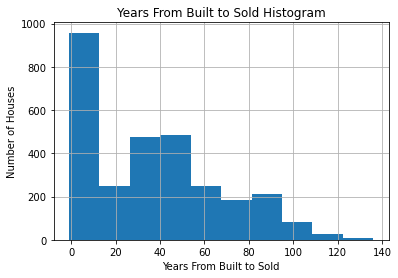

In [13]:
# `years_sold` histogram
years_sold.hist()
plt.title('Years From Built to Sold Histogram')
plt.xlabel('Years From Built to Sold')
plt.ylabel('Number of Houses')
plt.show()

This histogram is skewed to the right and shows that the greatest cluster of homes sold were fairly new, around 10 years or younger.  There were also a good amount of houses that are 30-50 years old.  However, there are less and less homes that are older than 50 years old.  Since the histogram is not uniform and does vary, it should be a good feature to add to our model.

Now let's create another feature, `years_since_remod`, that captures how many years have passed since the house was sold and when it was remodelled.  We will also remove any negative values as one cannot remodel a house prior to purchasing it.

In [14]:
# `years_since_remod` feature
years_since_remod = ames['Yr Sold'] - ames['Year Remod/Add']

# Identify any negative rows
years_since_remod[years_since_remod < 0]

1702   -1
2180   -2
2181   -1
dtype: int64

Let's view a histogram of the `years_since_remod` feature.

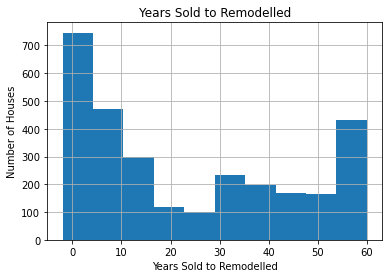

In [15]:
# `years_since_remod` histogram
years_since_remod.hist()
plt.title('Years Sold to Remodelled')
plt.xlabel('Years Sold to Remodelled')
plt.ylabel('Number of Houses')
plt.show()

 The histogram is not uniform and does show a larger cluster of houses that were remodelled recently after being sold, up to 10 years.  It also shows a large cluster of houses that were remodelled around 60 years after being sold.  This feature should be another good feature to add to our model.
 
 Let's go ahead and remove any negative rows, add the features, and remove the original year columns since we don't need them anymore.  

In [16]:
# Create new columns
ames['Years from Built to Sale'] = years_sold
ames['Years Since Remod'] = years_since_remod

# Drop rows with negative values
ames = ames.drop([1702, 2180, 2181], axis = 0)

# Remove original year columns
ames = ames.drop(['Year Built', 'Year Remod/Add'] , axis = 1)


Next we will drop columns that are not useful for Machine Learning and that leak data about the final sale. 

In [17]:
# Drop columns that are not useful for Machine Learning
ames = ames.drop(['Order', 'PID'], axis = 1)

# Drop columns that give insight about final sale price
ames = ames.drop(['Sale Type', 'Yr Sold', 'Sale Condition', 'Mo Sold'], axis = 1)

Now let's go ahead and modify our model.  We will change the `transform_features` function based on the analysis we did above.  The other two functions remain unchanged.  

In [18]:
# Function to transform features, modified
def transform_features(data):
    num_null = data.isnull().sum()
    drop_null_cols = num_null[(num_null > 0.05 * len(data))].sort_values()
    
    text_null_counts = data.select_dtypes(include = ['object']).isnull().sum().sort_values(ascending = False)
    drop_null_cols_2 = text_null_counts[text_null_counts > 0]
    data = data.drop(drop_null_cols_2.index, axis = 1)
    
    num_null = data.select_dtypes(['float', 'int']).isnull().sum()
    fixable_num_cols = num_null[(num_null < 0.05*len(ames)) & (num_null > 0)].sort_values()
    mode_dict = data[fixable_num_cols.index].mode().to_dict(orient = 'records')[0]
    data = data.fillna(mode_dict)
    
    years_sold = data['Yr Sold'] - data['Year Built']
    years_since_remod = data['Yr Sold'] - data['Year Remod/Add']
    data['Years from Built to Sale'] = years_sold
    data['Years Since Remod'] = years_since_remod
    data = data.drop([1702, 2180, 2181], axis = 0)
    
    data = data.drop(['Year Built', 'Year Remod/Add', 'Order', 'PID', 'Sale Type', 'Yr Sold', 'Sale Condition', 'Mo Sold'], axis = 1)
    return data

# Select various features, unchanged
def select_features(data):
    return data[['Gr Liv Area', 'SalePrice']]

# Train and test data, unchanged
def train_and_test(data):
    train = data[:1460]
    test = data[1460:]
    # Select only numeric columns
    numeric_train = train.select_dtypes(include = ['float', 'integer'])
    numeric_test = test.select_dtypes(include = ['float', 'integer'])
    # Remove target column
    features = numeric_train.columns.drop('SalePrice')
    lr = linear_model.LinearRegression()
    lr.fit(train[features], train['SalePrice'])
    predictions = lr.predict(test[features])
    mse = mean_squared_error(test['SalePrice'], predictions)
    rmse = np.sqrt(mse)
    
    return rmse

# Apply functions on ames dataset
ames = pd.read_csv('AmesHousing.tsv', delimiter = '\t')
transform_ames = transform_features(ames)
filtered_ames = select_features(transform_ames)
rmse_2 = train_and_test(filtered_ames)


rmse_2



55275.367312413066

This second model has lowered the rmse by about \\$2,000, which is not much.  The rmse is now $55,275.  We will proceed to feature selection in hopes of lowering the rmse much more.

## Feature Selection

We will commence feature selection by determining which features correlate strongly with our target column, `SalePrice`.  The following are the numerical columns in the ames dataset that we can generate correlation coefficients for.

In [19]:
numerical_ames = transform_ames.select_dtypes(include = ['float', 'int'])
numerical_ames.head()

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,SalePrice,Years from Built to Sale,Years Since Remod
0,20,141.0,31770,6,5,112.0,639.0,0.0,441.0,1080.0,1656,0,0,1656,1.0,0.0,1,0,3,1,7,2,1960.0,2.0,528.0,210,62,0,0,0,0,0,215000,50,50
1,20,80.0,11622,5,6,0.0,468.0,144.0,270.0,882.0,896,0,0,896,0.0,0.0,1,0,2,1,5,0,1961.0,1.0,730.0,140,0,0,0,120,0,0,105000,49,49
2,20,81.0,14267,6,6,108.0,923.0,0.0,406.0,1329.0,1329,0,0,1329,0.0,0.0,1,1,3,1,6,0,1958.0,1.0,312.0,393,36,0,0,0,0,12500,172000,52,52
3,20,93.0,11160,7,5,0.0,1065.0,0.0,1045.0,2110.0,2110,0,0,2110,1.0,0.0,2,1,3,1,8,2,1968.0,2.0,522.0,0,0,0,0,0,0,0,244000,42,42
4,60,74.0,13830,5,5,0.0,791.0,0.0,137.0,928.0,928,701,0,1629,0.0,0.0,2,1,3,1,6,1,1997.0,2.0,482.0,212,34,0,0,0,0,0,189900,13,12


Now let's create a heatmap of the numerical features correlation coefficients.  

Text(0.5, 1.0, 'Correlation Heatmap')

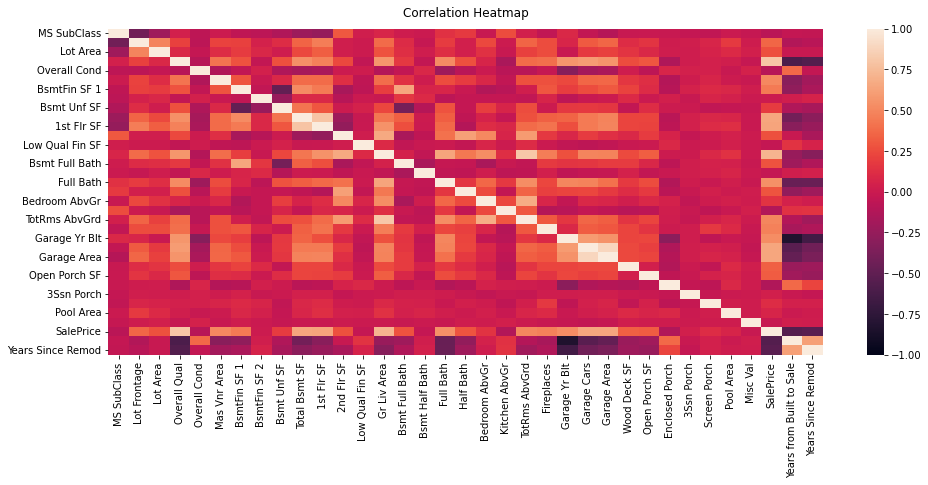

In [20]:
plt.figure(figsize = (16, 6))

heatmap = sns.heatmap(numerical_ames.corr(), vmin = -1, vmax = 1)
heatmap.set_title('Correlation Heatmap', fontdict = {'fontsize':12}, pad = 12)

We are interested in the row or columns for `SalePrice`.  Correlation coefficients close to 1 show a strong positive correlation and a coefficients close to -1 show a strong negative correlation.  `Overall Qual`, `Gr liv Area`, `Garage Cars`, and `Garage Area` have a strong positive correlation, while `Years from Build to Sale` and `Years Since Remod` have a strong negative correlation.  The fact that the correlation is positive or negative doesn't have an impact on whether we choose the feature for our model or not.  Thus, we will calculate the absolute value of the correlation coefficients. 

In [21]:
# Absolute values of correlation coefficients
abs_corr_coeff = numerical_ames.corr()['SalePrice'].abs().sort_values()
abs_corr_coeff

BsmtFin SF 2                0.006127
Misc Val                    0.019273
3Ssn Porch                  0.032268
Bsmt Half Bath              0.035875
Low Qual Fin SF             0.037629
Pool Area                   0.068438
MS SubClass                 0.085128
Overall Cond                0.101540
Screen Porch                0.112280
Kitchen AbvGr               0.119760
Enclosed Porch              0.128685
Bedroom AbvGr               0.143916
Bsmt Unf SF                 0.182751
Lot Area                    0.267520
2nd Flr SF                  0.269601
Bsmt Full Bath              0.276258
Half Bath                   0.284871
Open Porch SF               0.316262
Wood Deck SF                0.328183
Lot Frontage                0.357718
BsmtFin SF 1                0.439284
Fireplaces                  0.474831
TotRms AbvGrd               0.498574
Mas Vnr Area                0.506983
Garage Yr Blt               0.527047
Years Since Remod           0.534985
Full Bath                   0.546118
Y

In order to only select features that correlate with the sale price, we will only keep columns with a correlation coefficient of 0.4 or greater, which is a moderate or strong correlation.  

In [22]:
# Keep only columns with a correlation coefficient of 0.4 or larger
abs_corr_coeff[abs_corr_coeff > 0.4]

BsmtFin SF 1                0.439284
Fireplaces                  0.474831
TotRms AbvGrd               0.498574
Mas Vnr Area                0.506983
Garage Yr Blt               0.527047
Years Since Remod           0.534985
Full Bath                   0.546118
Years from Built to Sale    0.558979
1st Flr SF                  0.635185
Garage Area                 0.641425
Total Bsmt SF               0.644012
Garage Cars                 0.648361
Gr Liv Area                 0.717596
Overall Qual                0.801206
SalePrice                   1.000000
Name: SalePrice, dtype: float64

Then we will drop the features that have a less than 0.4 correlation.

In [23]:
# Drop columns with less than a 0.4 correlation with 'SalePrice'
transform_ames = transform_ames.drop(abs_corr_coeff[abs_corr_coeff < 0.4].index, axis = 1)

Now we will progress to the categorical columns.  Here is a list of the categorical features.

In [24]:
# List of column names that are categorical
categorical_features = ['Sale Condition', 'Sale Type', 'Misc Feature', 'Garage Type', 'Central Air', 'Heating', 'Foundation',
                       'Mas Vnr Type', 'Exterior 1st', 'Exterior 2nd', 'Roof Matl', 'Roof Style', 'House Style', 'Bldg Type',
                       'Condition 1', 'Condition 2', 'Neighborhood', 'Lot Config', 'Land Contour', 'Alley', 'Street', 
                        'MS Zoning', 'MS SubClass', 'PID']

In order to create a strong model, we need to ensure that our categorical features do not have a high cardinality.  A high cardinality exists when a a feature has many unique values.  This leads to space consumption and problems with dimensionality because as the number of features grows, the amount of data that we need to distinguish the features grows exponentially.  Thus, we will drop any columns with more than 10 unique values to ensure we don't run into these issues. 

In [25]:
# Create a list of categorical columns in `transform_ames`
transform_cat_cols = []
for col in categorical_features:
    if col in transform_ames.columns:
        transform_cat_cols.append(col)
        
#Count the number of unique values in each categorical column
def count_unique(col):
    return len(col.value_counts().sort_values())
unique_counts = transform_ames[transform_cat_cols].apply(count_unique)

# Drop columns with more than 10 unique values
drop_nonuniq_cols = unique_counts[unique_counts > 10].index
transform_ames = transform_ames.drop(drop_nonuniq_cols, axis = 1)

Now we will convert any remaining text columns to categorical.  

In [26]:
# Convert the remaining text columns to categorical 
text_cols = transform_ames.select_dtypes( include = ['object'])
for col in text_cols:
    transform_ames[col] = transform_ames[col].astype('category')
    
# Add columns back to dataframe
transform_ames = pd.concat([
    transform_ames, 
    pd.get_dummies(transform_ames.select_dtypes(include=['category']))
], axis=1).drop(text_cols,axis=1)

We are ready to create our third model.  The `transform_features` function will remain the same as the second model's, but we will change `select_features` to exhibit the modifications discussed recently.

We will also work on the `train_and_test` function by conducting k-fold cross validation and choose a k value of 4 for our model.  Let's see what our rmse will be. 

In [27]:
# Function to transform features, unchanged
def transform_features(data):
    num_null = data.isnull().sum()
    drop_null_cols = num_null[(num_null > 0.05 * len(data))].sort_values()
    data = data.drop(drop_null_cols.index, axis = 1)
    
    text_null_counts = data.select_dtypes(include = ['object']).isnull().sum().sort_values(ascending = False)
    drop_null_cols_2 = text_null_counts[text_null_counts > 0]
    data = data.drop(drop_null_cols_2.index, axis = 1)
    
    num_null = data.select_dtypes(['float', 'int']).isnull().sum()
    fixable_num_cols = num_null[(num_null < 0.05*len(ames)) & (num_null > 0)].sort_values()
    mode_dict = data[fixable_num_cols.index].mode().to_dict(orient = 'records')[0]
    data = data.fillna(mode_dict)
    
    years_sold = data['Yr Sold'] - data['Year Built']
    years_since_remod = data['Yr Sold'] - data['Year Remod/Add']
    data['Years from Built to Sale'] = years_sold
    data['Years Since Remod'] = years_since_remod
    data = data.drop([1702, 2180, 2181], axis = 0)
    
    data = data.drop(['Year Built', 'Year Remod/Add', 'Order', 'PID', 'Sale Type', 'Yr Sold', 'Sale Condition', 'Mo Sold'], axis = 1)
    return data

# Select various features, modified
def select_features(data, coeff_threshold = 0.40, uniq_threshold = 10):
    numerical_data = data.select_dtypes(include = ['float', 'int'])
    abs_corr_coeff = numerical_data.corr()['SalePrice'].abs().sort_values()
    data = data.drop(abs_corr_coeff[abs_corr_coeff < coeff_threshold].index, axis = 1)
    
    categorical_features = ['Sale Condition', 'Sale Type', 'Misc Feature', 'Garage Type', 'Central Air', 'Heating', 'Foundation',
                       'Mas Vnr Type', 'Exterior 1st', 'Exterior 2nd', 'Roof Matl', 'Roof Style', 'House Style', 'Bldg Type',
                       'Condition 1', 'Condition 2', 'Neighborhood', 'Lot Config', 'Land Contour', 'Alley', 'Street', 
                        'MS Zoning', 'MS SubClass', 'PID']
    
    transform_cat_cols = []
    for col in categorical_features:
        if col in data.columns:
            transform_cat_cols.append(col)
            
    def count_unique(col):
        return len(col.value_counts().sort_values())
    
    unique_counts = data[transform_cat_cols].apply(count_unique)
    drop_nonuniq_cols = unique_counts[unique_counts > uniq_threshold].index
    data = data.drop(drop_nonuniq_cols, axis = 1)
    
    text_cols = data.select_dtypes( include = ['object'])
    for col in text_cols:
        data[col] = data[col].astype('category')
    data = pd.concat([data, pd.get_dummies(data.select_dtypes(include=['category']))], axis=1).drop(text_cols,axis=1)
    
    return data


# Train and test data
def train_and_test(data, k=0):
    numeric_data = data.select_dtypes(include=['integer', 'float'])
    features = numeric_data.columns.drop("SalePrice")
    lr = linear_model.LinearRegression()
    
    if k == 0:
        train = data[:1460]
        test = data[1460:]

        lr.fit(train[features], train["SalePrice"])
        predictions = lr.predict(test[features])
        mse = mean_squared_error(test["SalePrice"], predictions)
        rmse = np.sqrt(mse)

        return rmse
    
    if k == 1:
        # Randomize *all* rows (frac=1) from `df` and return
        shuffled_data = data.sample(frac=1, )
        train = data[:1460]
        test = data[1460:]
        
        lr.fit(train[features], train["SalePrice"])
        predictions_one = lr.predict(test[features])        
        
        mse_one = mean_squared_error(test["SalePrice"], predictions_one)
        rmse_one = np.sqrt(mse_one)
        
        lr.fit(test[features], test["SalePrice"])
        predictions_two = lr.predict(train[features])        
       
        mse_two = mean_squared_error(train["SalePrice"], predictions_two)
        rmse_two = np.sqrt(mse_two)
        
        avg_rmse = np.mean([rmse_one, rmse_two])
        print(rmse_one)
        print(rmse_two)
        return avg_rmse
    else:
        kf = KFold(n_splits=k, shuffle=True)
        rmse_values = []
        for train_index, test_index, in kf.split(data):
            train = data.iloc[train_index]
            test = data.iloc[test_index]
            lr.fit(train[features], train["SalePrice"])
            predictions = lr.predict(test[features])
            mse = mean_squared_error(test["SalePrice"], predictions)
            rmse = np.sqrt(mse)
            rmse_values.append(rmse)
        print(rmse_values)
        avg_rmse = np.mean(rmse_values)
        return avg_rmse

# Apply functions on ames dataset
ames = pd.read_csv('AmesHousing.tsv', delimiter = '\t')
transform_ames = transform_features(ames)
filtered_ames = select_features(transform_ames)
rmse_3 = train_and_test(filtered_ames, k =3)


rmse_3


[24927.030518205094, 27879.99055564195, 34684.61694713494]


29163.87934032733

Our rmse dropped to \\$29163, which is almost half of what it was with the first model.  Below is a graph of the rmse progression through the three models we developed.

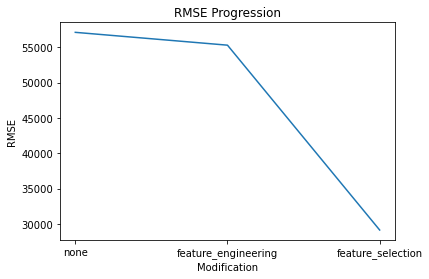

In [28]:
# Graph of rmse progression 
modifications = ['none', 'feature_engineering', 'feature_selection']
rmse = [rmse_1, rmse_2, rmse_3]
plt.plot(modifications, rmse)
plt.title('RMSE Progression')
plt.xlabel('Modification')
plt.ylabel('RMSE')
plt.show()

It is clear that feature engineering lowered the rmse, but not by much, only \\$2000.  Feature selection, on the other hand, lowered the rmse an additional \\$25000, which is significant.  Our model seems to be adequate for predicting house sale prices in Ames, Iowa.

Further exploration can be conducted on how mortgage rates, inflation rates, and other economic factors affect the sale prices as well. The housing market is not merely based on the condition of the house, but rather the condition of an economy. 